In [1]:
import tensorflow as tf


#creating data

In [2]:
from sklearn.datasets import make_circles

x,y=make_circles(n_samples=1000,noise=0.03,random_state=42)


#visualize data

In [3]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})
circles


,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


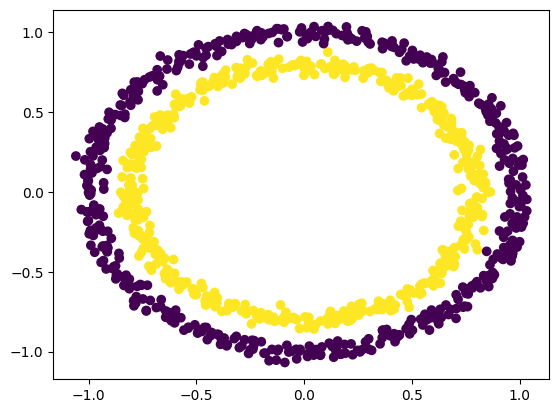

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap="viridis")
plt.show()

In [5]:
x.shape,y.shape

((1000, 2), (1000,))

In [6]:
tf.random.set_seed(42)
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
model.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4808 - loss: 5.5538
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4808 - loss: 5.5269
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4828 - loss: 5.4850
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4834 - loss: 5.4657
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4828 - loss: 5.4020


In [7]:
# increase duraction
model.fit(x,y,epochs=200,verbose=0)
model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4378 - loss: 4.7943


[4.397525310516357, 0.4729999899864197]

In [8]:
tf.random.set_seed(42)

model2=tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
model2.fit(x,y,epochs=50,verbose=0)

In [9]:
#improve model

In [10]:
y_pred=model2.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot(model, x, y):
    # define bounds
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    # create meshgrid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # predict
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    # binary vs multiclass
    if y_pred.shape[1] > 1:
        print("multi-class classification")
        y_pred = np.argmax(y_pred, axis=1)
    else:
        print("binary classification")
        y_pred = np.round(y_pred).flatten()

    y_pred = y_pred.reshape(xx.shape)

    # plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


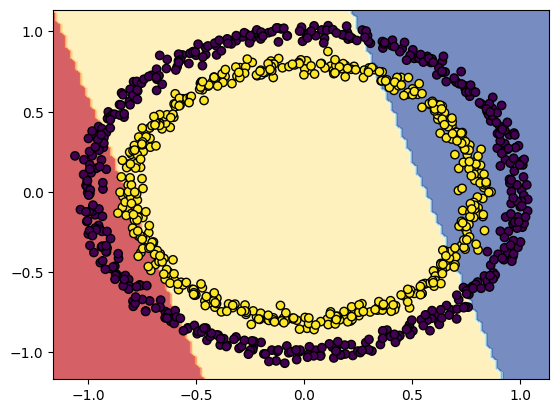

In [12]:
# check model prediciton
plot(model=model2,x=x,y=y)


In [14]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history=model.fit(x,y,epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4773 - loss: 3.9936
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4781 - loss: 3.9213
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 3.8925
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4781 - loss: 3.8668
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4781 - loss: 3.8595
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4781 - loss: 3.8503
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4777 - loss: 3.7824
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4794 - loss: 3.7219
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4794 - loss: 3.6590
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4794 - loss: 3.6464
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4794 - loss: 3.6393
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4792 - lo

Text(0, 0.5, 'loss')

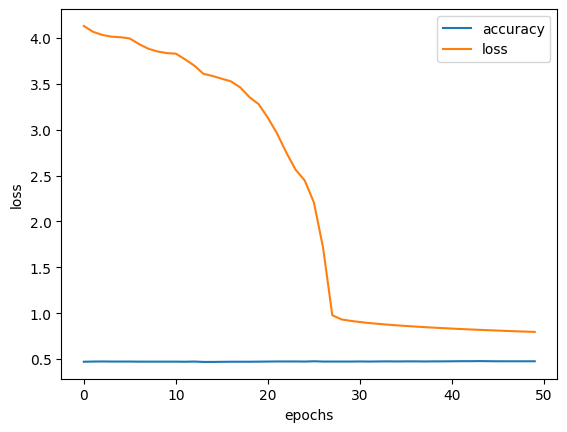

In [18]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [19]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history=model.fit(x,y,epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4754 - loss: 0.7755
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4864 - loss: 0.7482
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4922 - loss: 0.7309
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4941 - loss: 0.7192
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4952 - loss: 0.7111
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4952 - loss: 0.7053
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5005 - loss: 0.7011
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5008 - loss: 0.6982
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5038 - loss: 0.6961
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5097 - loss: 0.6946
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5114 - loss: 0.6936
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5078 - lo

In [20]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history=model.fit(x,y,epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5121 - loss: 0.6935
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 0.6929
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 0.6930 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5542 - loss: 0.6932
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5212 - loss: 0.6933
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4893 - loss: 0.6933
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4823 - loss: 0.6934
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4610 - loss: 0.6934 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 0.6934
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4603 - loss: 0.6935
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4580 - loss: 0.6935
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4573 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
binary classification


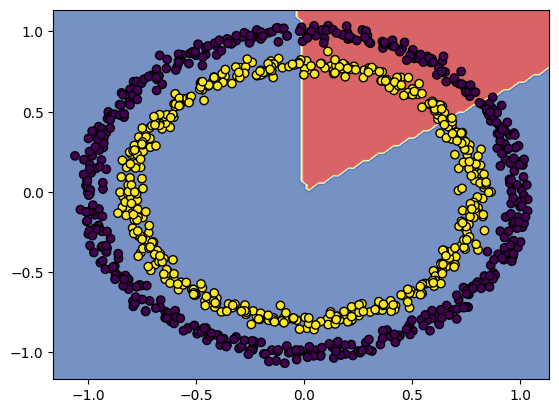

In [21]:
plot(model=model3,x=x,y=y)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)


In [47]:
model4=tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model4.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])
history=model4.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5485 - loss: 0.6886 - val_accuracy: 0.5312 - val_loss: 0.6820
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5679 - loss: 0.6695 - val_accuracy: 0.6062 - val_loss: 0.6759
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6273 - loss: 0.6645 - val_accuracy: 0.5750 - val_loss: 0.6715
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6164 - loss: 0.6530 - val_accuracy: 0.6125 - val_loss: 0.6588
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6230 - loss: 0.6425 - val_accuracy: 0.6625 - val_loss: 0.6422
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6854 - loss: 0.6276 - val_accuracy: 0.7063 - val_loss: 0.6216
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7457 - loss: 0.6062 - val_accuracy: 0.7937 - val_loss: 0.5935
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7870 - loss: 0.5776 - val_accuracy: 0.8188 - val_lo

In [48]:
model4.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9618 - loss: 0.1849  


[0.20288030803203583, 0.9399999976158142]

Text(0, 0.5, 'loss')

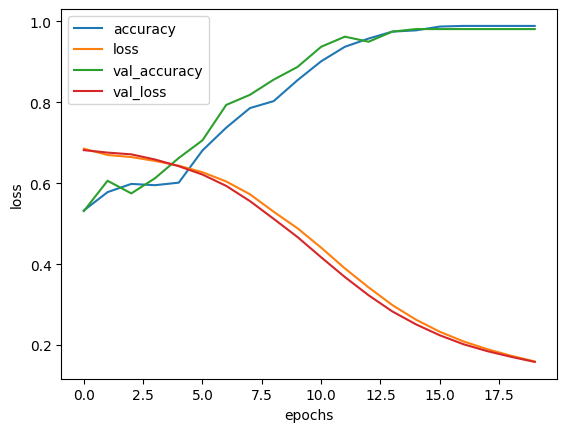

In [49]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


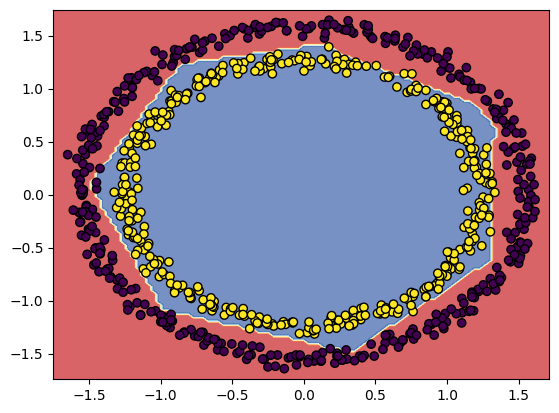

In [50]:
plot(model=model4,x=x_train,y=y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
binary classification


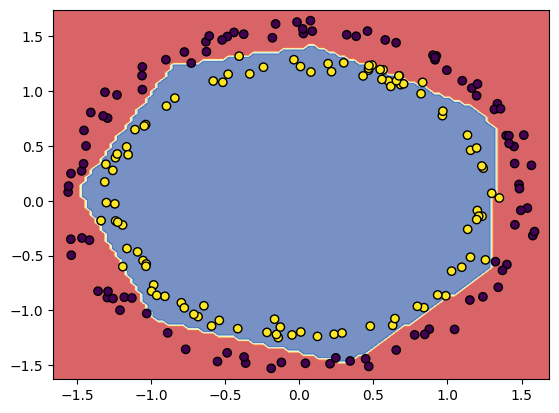

In [53]:
plot(model=model4,x=x_test,y=y_test)